In [1]:
#Objective 1:
#The military spending of at least the top 10 nations (in military spending)
# Military spending of top 19 nations has been shown in the graph


In [2]:
#SmrithiAjit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Military spending(in millions,USD) data of countries is being read 
pd.set_option('display.precision',2)
try:
    df = pd.read_excel('siprinew.xlsx',sheetname='Current USD')
except:
    print("File not found")

df=df[df['Country'].isin(['USA','UK','Russian Federation','Argentina','France','Germany','Italy','Japan','Canada','China','Brazil','Indonesia','Australia','India','Turkey','Mexico','Saudi Arabia','South Africa','Korea, South'])]
spend=df.set_index('Country')
B=[i for i in range(2007,2017)]

spending1=pd.DataFrame(spend[B].stack(),columns=['Military spending'])
spending2=spending1.reset_index().rename(columns={'level_1': 'Year'}).set_index(['Year','Country']).sort_index()
df_spending=spending2
df_spending=pd.DataFrame(df_spending.astype(float))


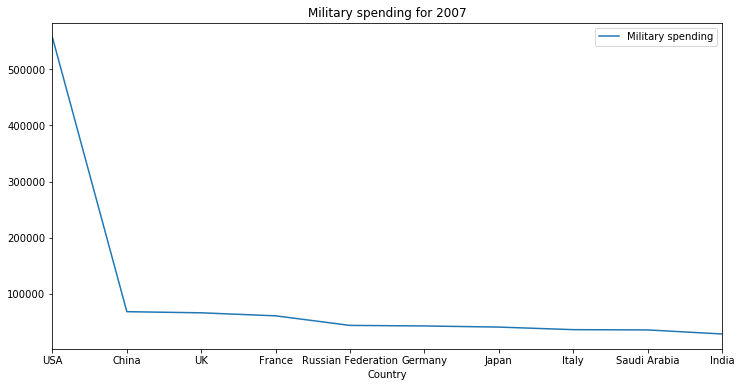

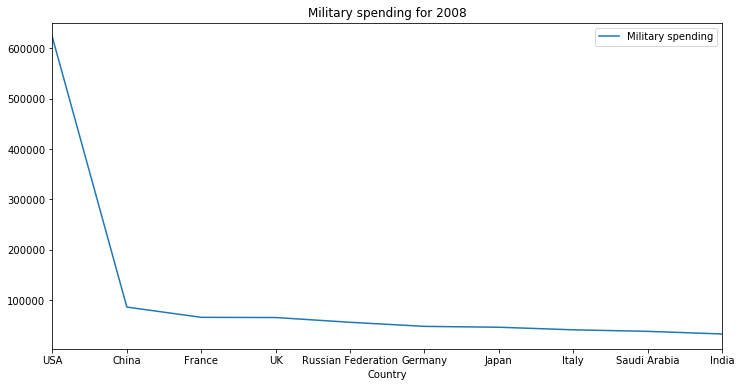

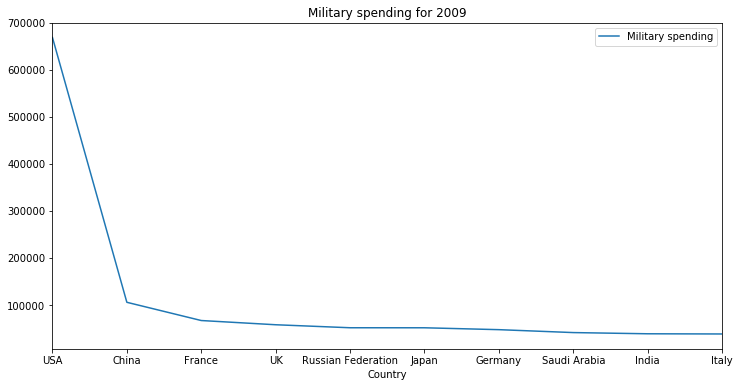

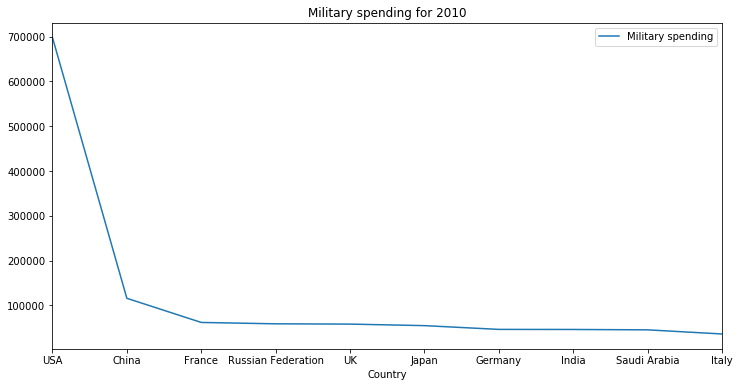

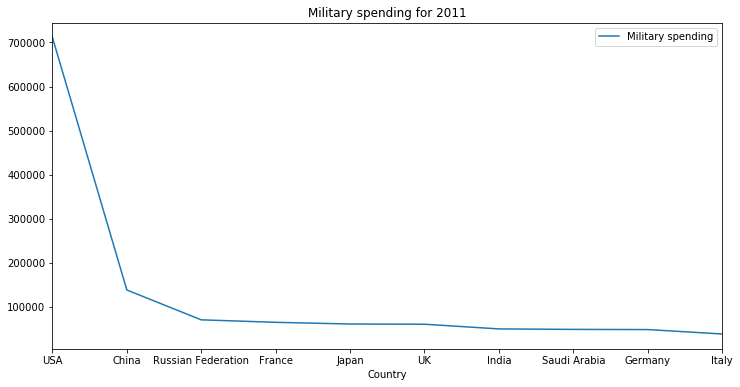

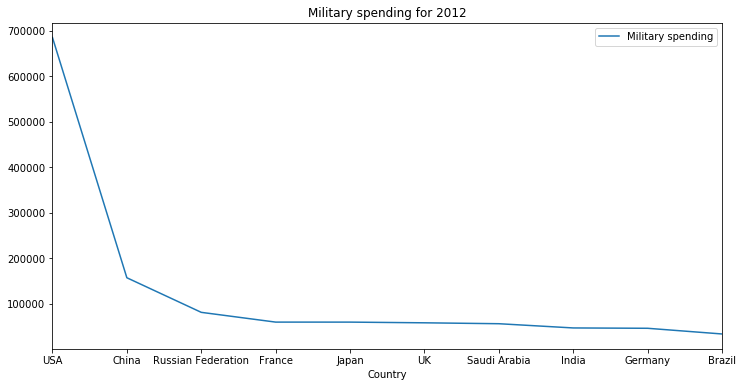

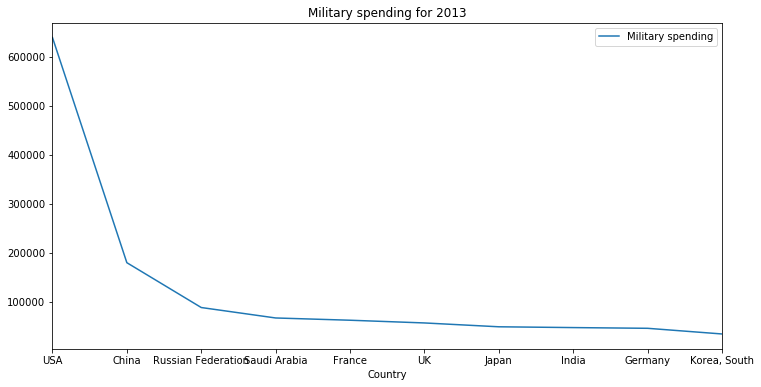

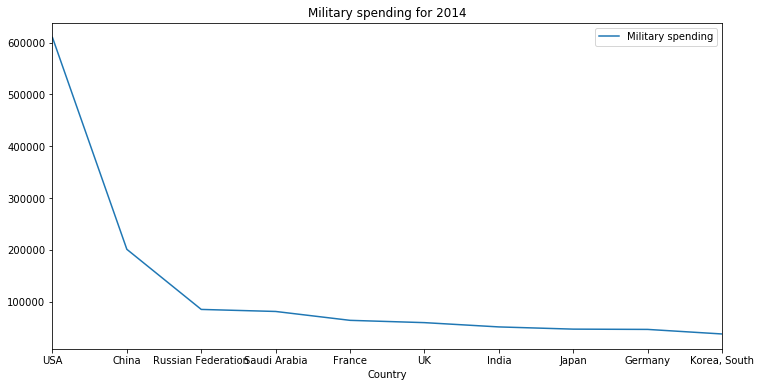

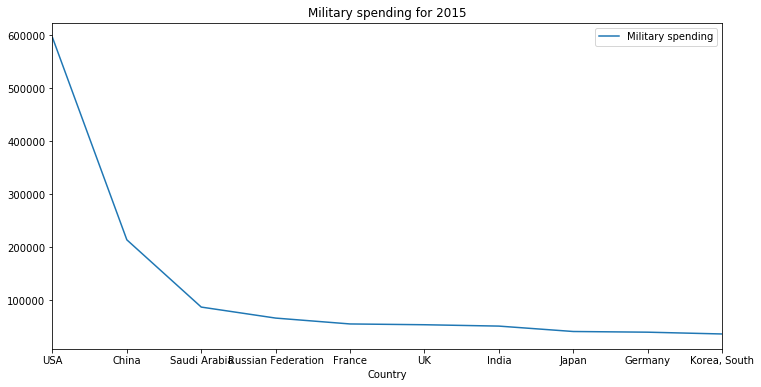

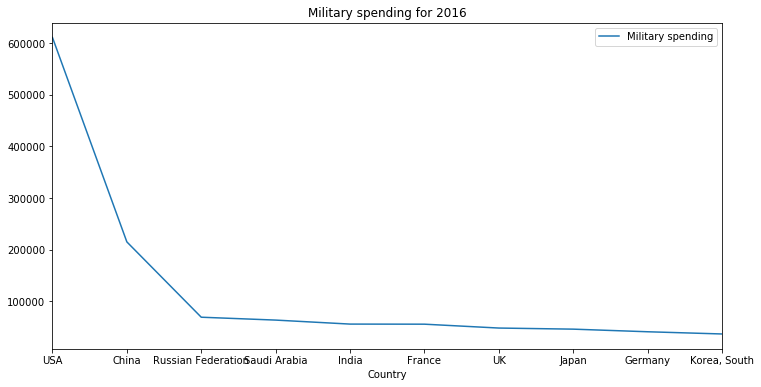

In [4]:
#military spending for top ten countries for every year
df_spending=pd.DataFrame(df_spending.astype(float))
for i in range (2007,2017):
    df_spending.loc[i].sort_values(by='Military spending',ascending=False)[:10].plot.line(title="Military spending for"+" "+str(i),figsize=(12,6))
    plt.show()

#Display the top 10 countries in military spending
#df1=df_spending.loc[2007].sort_values(by='Military spending',ascending=False)[:10]
#dfnew4
#df_spending


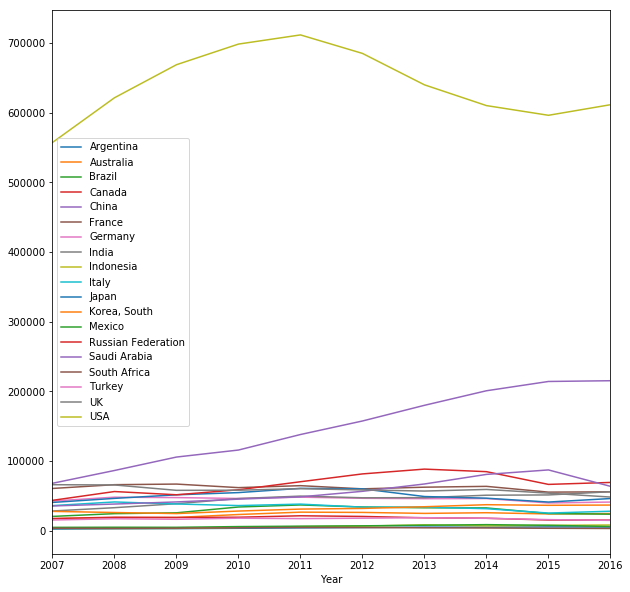

In [18]:
#Graph to show military spending of the top 19 countries
ef=df_spending.unstack()[['Military spending']]
ef.columns=ef.columns.droplevel()
ef.plot.line(figsize=(10,10))
plt.legend(loc="best")
plt.show()

# ef.sort_values(by='Military spending', ascending=False)

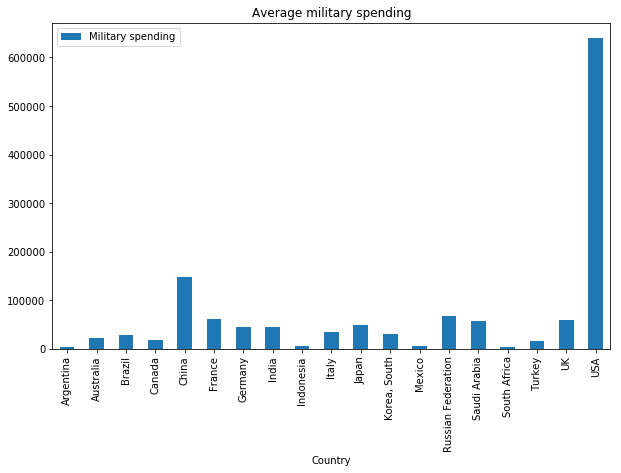

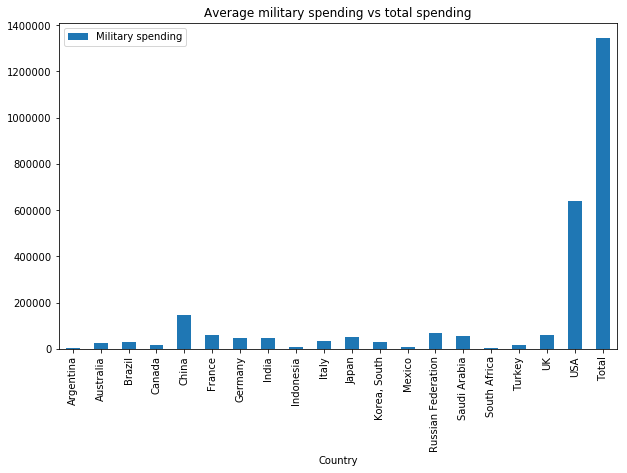

In [5]:
#3.comparing average military spending
df_spending['Military spending']=df_spending['Military spending'].astype(float)
gh=df_spending.groupby('Country').mean().transpose()
gh.transpose().plot.bar(title="Average military spending",figsize=(10,6))
g20=['USA','UK','Russian Federation','France','Germany','Italy','Japan','Canada','China','Brazil','Indonesia','Australia','India','Turkey','Mexico','Saudi Arabia','South Africa','Korea, South']
#comparing average military spending for countries with total military spending
gh['Total']=gh['Argentina']
for j in g20:
    gh['Total']=gh['Total']+gh[j]
gh.transpose().plot.bar(title="Average military spending vs total spending",figsize=(10,6))
plt.show()

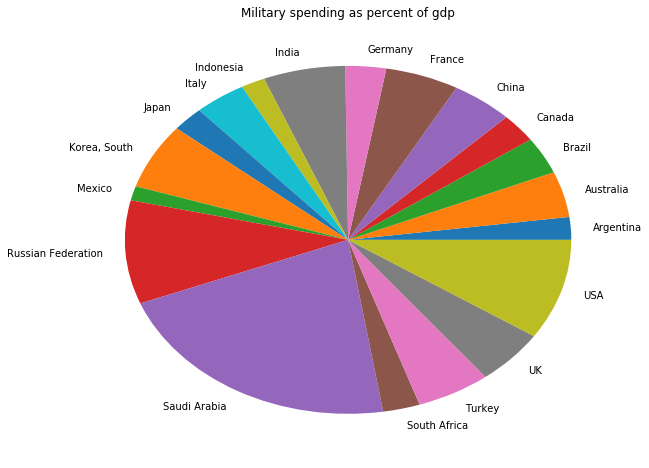

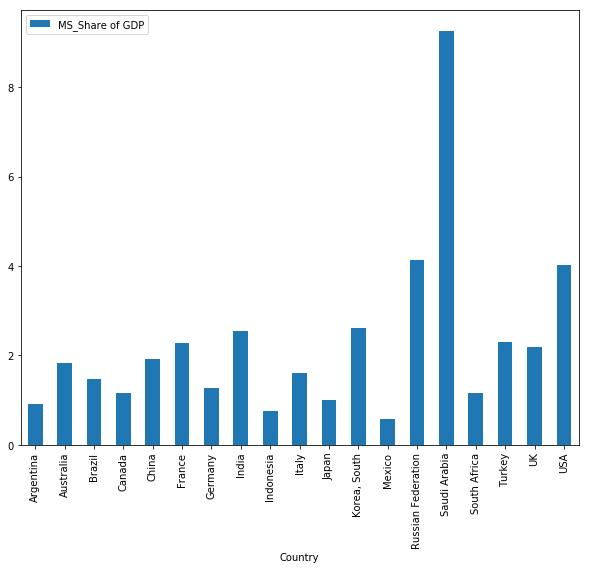

In [6]:
#2. Displays military spending of these countries as a percentage of their GDP(millions)
df_gdp=pd.read_excel('siprinew.xlsx',sheetname='Share of GDP')
df_gdp=df_gdp[df_gdp['Country'].isin(['USA','UK','Russian Federation','Argentina','France','Germany','Italy','Japan','Canada','China','Brazil','Indonesia','Australia','India','Turkey','Mexico','Saudi Arabia','South Africa','Korea, South'])]
spend=df_gdp.set_index('Country')
B=[i for i in range(2007,2017)]

spending3=pd.DataFrame(spend[B].stack(),columns=['MS_Share of GDP'])
spending4=spending3.reset_index().rename(columns={'level_1': 'Year'}).set_index(['Year','Country']).sort_index()
df_gdp=spending4
df_gdp
dftotal1=df_spending.join(df_gdp)
dftotal2=pd.DataFrame(dftotal1.astype(float))
dftotal2['MS_Share of GDP']=dftotal2['MS_Share of GDP']*100
dftotal2[['MS_Share of GDP']].groupby('Country').mean().plot.pie(y='MS_Share of GDP',title="Military spending as percent of gdp",figsize=(10,8),legend=False,label='')
dftotal2[['MS_Share of GDP']].groupby('Country').mean().plot.bar(title="",figsize=(10,8))
plt.show()

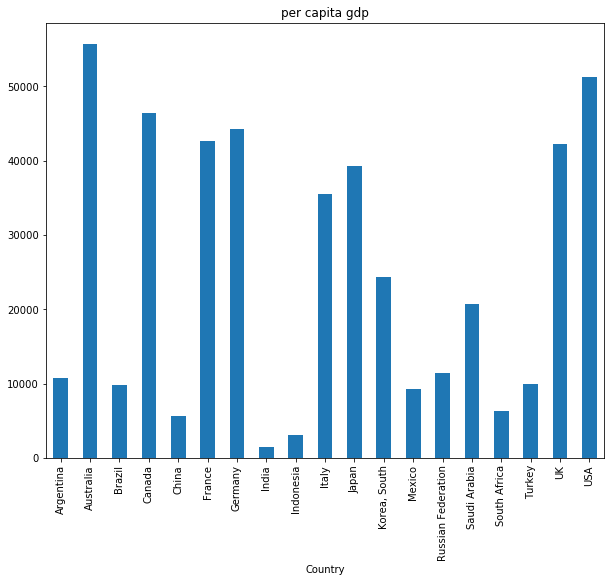

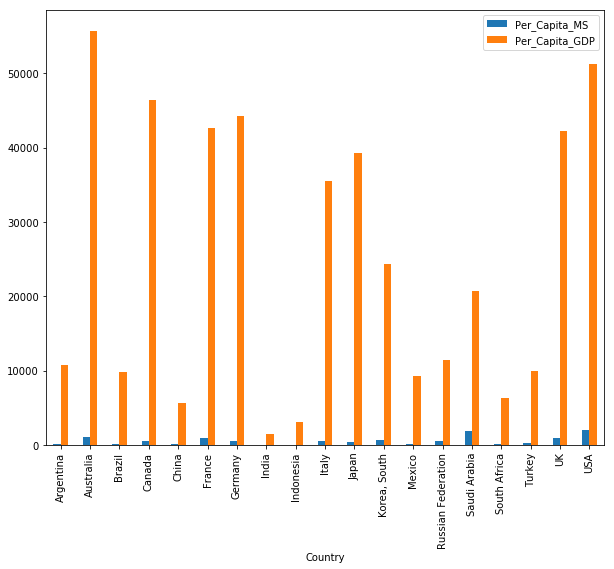

Military spending  MS_Share of GDP  Per_Capita_MS Population  \
Year Country                                                                   
2007 Argentina            2296.45             0.88          57.45         40   
     Australia           17186.44             1.82         819.34         21   
     Brazil              20485.76             1.50         106.26    1.9e+02   
     Canada              17417.14             1.22         528.08         33   
     China               68011.56             1.92          51.54    1.3e+03   

                GDP(true)  Per_Capita_GDP  
Year Country                               
2007 Argentina   2.62e+05         6566.21  
     Australia   9.46e+05        45117.33  
     Brazil      1.37e+06         7090.04  
     Canada      1.43e+06        43228.67  
     China       3.54e+06         2684.37

In [19]:
#Adding column of percapita military spending
# Comparison of per capita military spending to per capita GDP
df_percapita=pd.read_excel('siprinew.xlsx',sheetname='Per capita')
df_percapita=df_percapita[df_percapita['Country'].isin(['USA','UK','Russian Federation','Argentina','France','Germany','Italy','Japan','Canada','China','Brazil','Indonesia','Australia','India','Turkey','Mexico','Saudi Arabia','South Africa','Korea, South'])]
spend=df_percapita.set_index('Country')
B=[i for i in range(2007,2017)]
spending5=pd.DataFrame(spend[B].stack(),columns=['Per_Capita_MS'])
spending6=spending5.reset_index().rename(columns={'level_1': 'Year'}).set_index(['Year','Country']).sort_index()
df_percapita=spending6
df_percapita
dftotal2
dftotal=dftotal2.join(df_percapita)
dftotal
dftotal['Population']=dftotal['Military spending']/dftotal['Per_Capita_MS']
dftotal['GDP(true)']=dftotal['Military spending']/dftotal['MS_Share of GDP']
dftotal['GDP(true)']=dftotal['GDP(true)']/10*1000
dftotal['Per_Capita_GDP']=dftotal['GDP(true)']/dftotal['Population']
dftotal['Per_Capita_GDP']=dftotal['Per_Capita_GDP'].astype(float)
dftotal['Per_Capita_MS']=dftotal['Per_Capita_MS'].astype(float)
dftotal['Per_Capita_GDP'].groupby('Country').mean().plot.bar(title="per capita gdp",figsize=(10,8))
k=dftotal[['Per_Capita_MS','Per_Capita_GDP']].groupby('Country').mean().plot.bar(title="",figsize=(10,8))
plt.show()
dftotal.head()




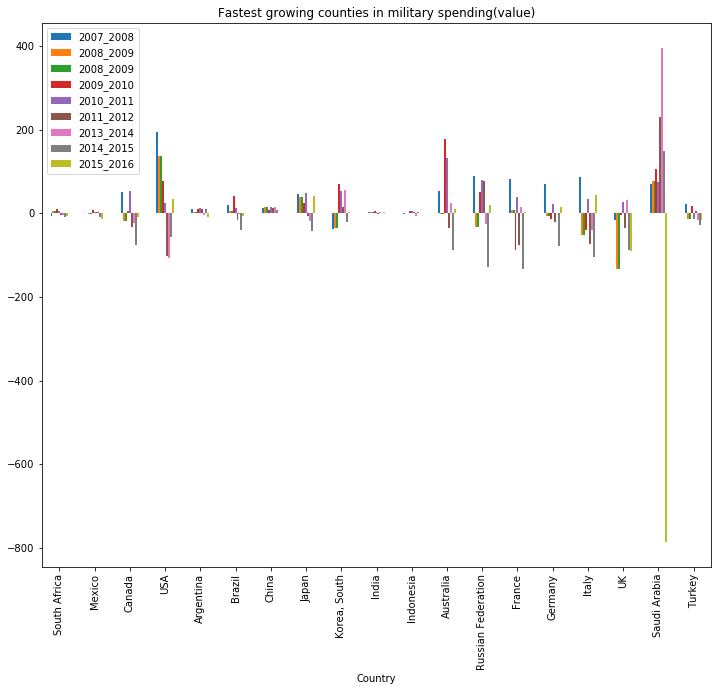

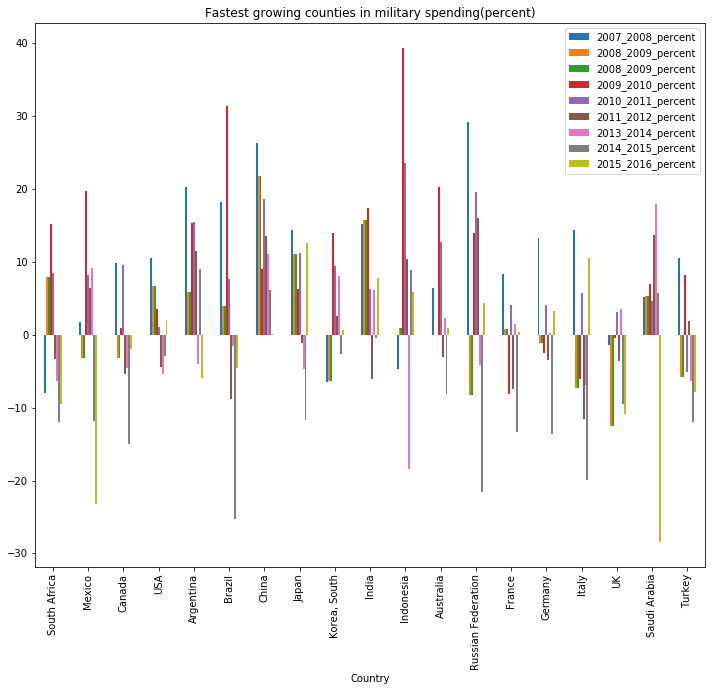

In [17]:
#comparing change in values of military spending
dfnew=df_spending
dfnew['Diff(value)']=dfnew['Military spending'].diff(-1)
dfnew['Diff(as %)']=dfnew['Diff(value)']*100/dfnew['Military spending']

countries=['USA','UK','Russian Federation','Argentina','France','Germany','Italy','Japan','Canada','China','Brazil','Indonesia','Australia','India','Turkey','Mexico','Saudi Arabia','South Africa','Korea, South']
years=[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
gh=spend[years]
newdf1=pd.DataFrame(gh[2007].astype(float))
for i in range(2008,2017):
    newdf1=newdf1.join(pd.DataFrame(gh[i].astype(float)))
    
newdf1
for i in range(2007,2016):
    newdf1[str(i)+"_"+str(i+1)]=newdf1[i+1]-newdf1[i]
    newdf1[str(i)+"_"+str(i+1)+"_percent"]=(newdf1[i+1]-newdf1[i])*100/(newdf1[i])
    

newdf1[['2007_2008','2008_2009','2008_2009','2009_2010','2010_2011','2011_2012','2013_2014','2014_2015','2015_2016']].plot.bar(title="Fastest growing counties in military spending(value)",figsize=(12,10))
newdf1[['2007_2008_percent','2008_2009_percent','2008_2009_percent','2009_2010_percent','2010_2011_percent','2011_2012_percent','2013_2014_percent','2014_2015_percent','2015_2016_percent']].plot.bar(title="Fastest growing counties in military spending(percent)",figsize=(12,10))
plt.show()